# Fundamentos de NumPy y Pandas

Este notebook tiene como objetivo introducir las bases de NumPy y Pandas. Se incluyen ejercicios de manipulación de arrays y análisis exploratorio de datos usando el dataset `Wine` de sklearn.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Verificar versión de Python y recursos disponibles
import sys
print("Versión de Python:", sys.version)

# Verificar GPU disponible (opcional)
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
GPU disponible: []
Entorno configurado correctamente en Google Colab


## Manipulación de Arrays con NumPy

A continuación se presentan ejercicios básicos para crear, manipular y analizar arrays NumPy.

In [2]:
# Crear arrays y aplicar operaciones básicas
a = np.array([1, 2, 3, 4, 5])
print("Array original:", a)
print("Suma:", np.sum(a))
print("Media:", np.mean(a))
print("Desviación estándar:", np.std(a))
print("Elementos al cuadrado:", a ** 2)

Array original: [1 2 3 4 5]
Suma: 15
Media: 3.0
Desviación estándar: 1.4142135623730951
Elementos al cuadrado: [ 1  4  9 16 25]


## Análisis de Datos con Pandas - Dataset Wine

Usaremos el dataset `Wine` disponible en `sklearn.datasets`. Este dataset contiene características químicas de diferentes tipos de vino.

In [3]:
# Cargar dataset Wine desde sklearn
from sklearn.datasets import load_wine

wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Mostrar primeras filas
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Información general del dataset

In [4]:
# Información general
print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nResumen estadístico:")
print(df.describe())

Dimensiones: (178, 14)

Tipos de datos:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

Resumen estadístico:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000

In [8]:
# Tipos de datos y valores nulos
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
# Estadísticas por clase de vino
df.groupby('target').mean()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [10]:
# Conteo de vinos por tipo
df['target'].value_counts()


,count
target,
1,71
0,59
2,48


### Distribución de clases

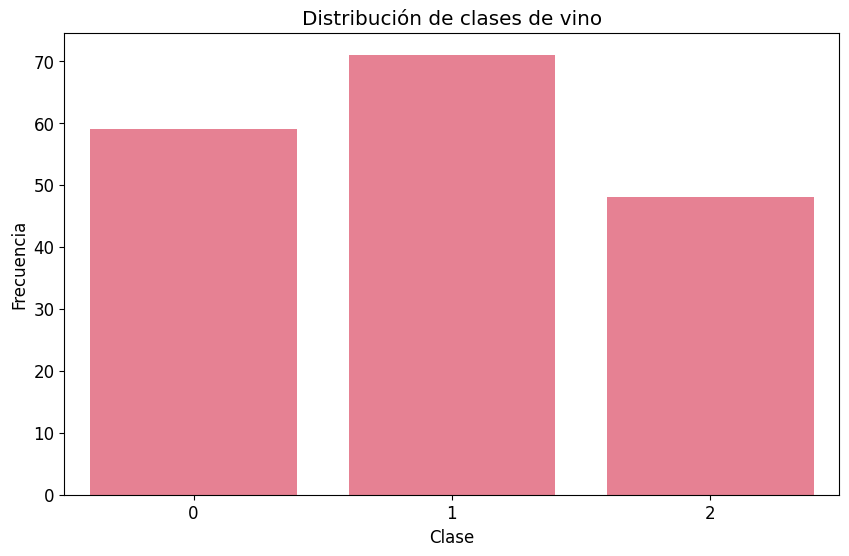

In [5]:
# Visualización de la variable objetivo
sns.countplot(x='target', data=df)
plt.title("Distribución de clases de vino")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

### Matriz de correlación entre variables

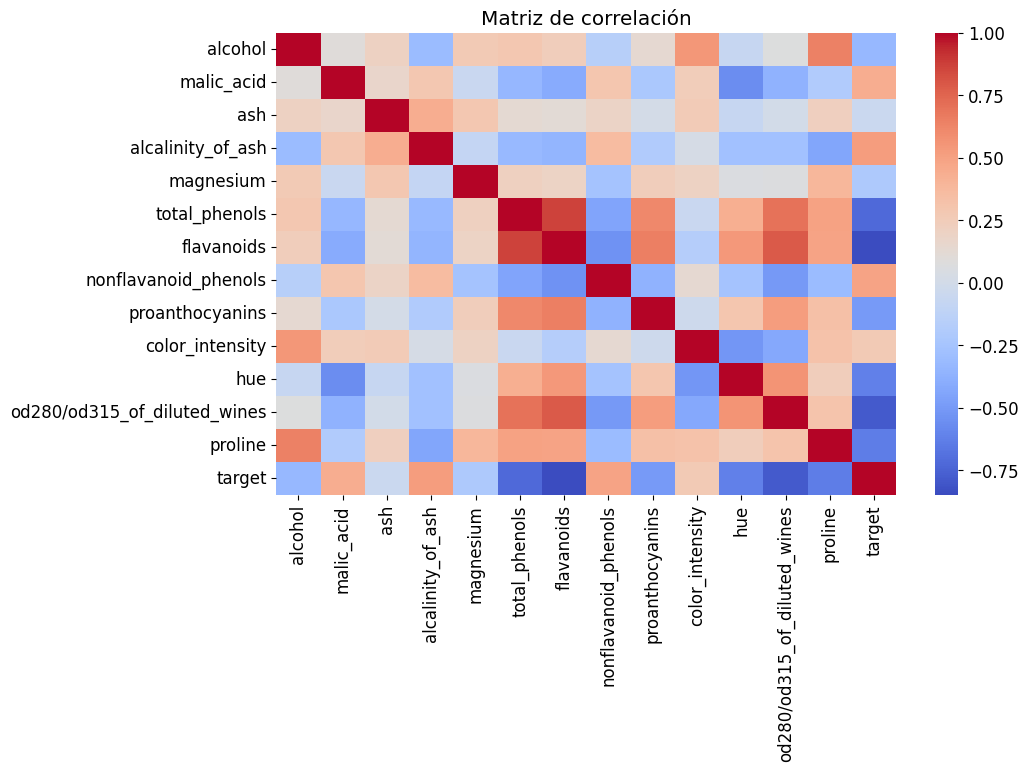

In [6]:
# Correlación entre variables
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title("Matriz de correlación")
plt.show()

### Visualización con Pairplot (muestra de variables)

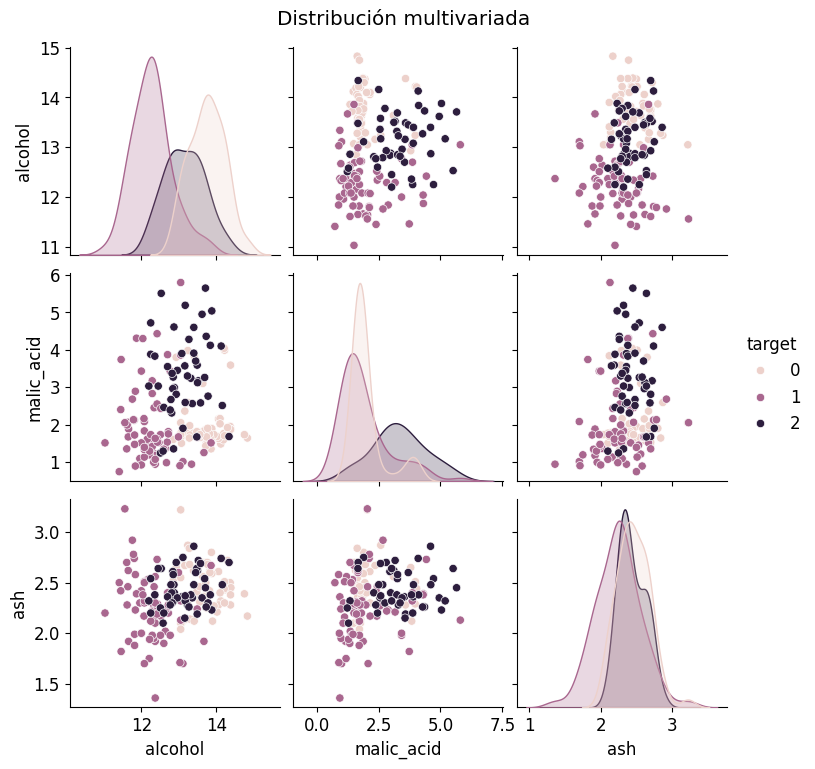

In [7]:
# Pairplot con 4 variables seleccionadas
sns.pairplot(df[['alcohol', 'malic_acid', 'ash', 'target']], hue='target')
plt.suptitle("Distribución multivariada", y=1.02)
plt.show()

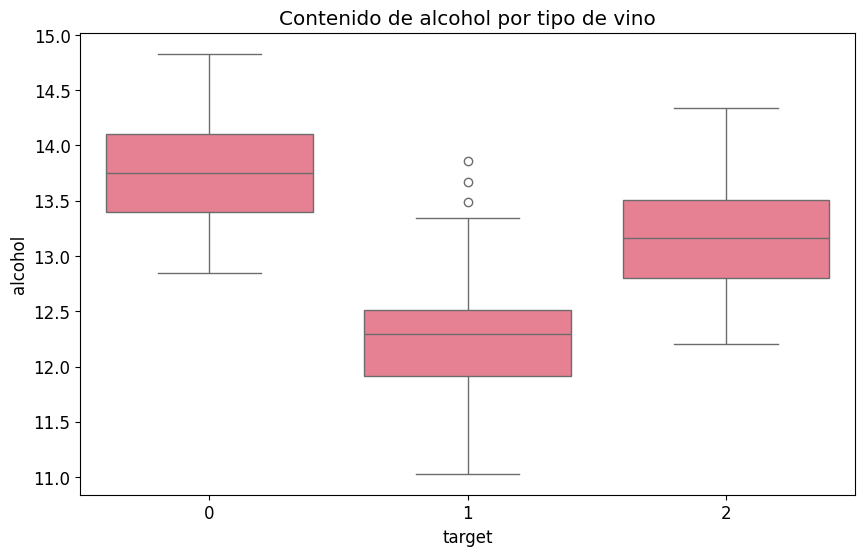

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparación de alcohol por tipo de vino
sns.boxplot(data=df, x='target', y='alcohol')
plt.title("Contenido de alcohol por tipo de vino")
plt.show()


## Conclusiones

- El dataset contiene 3 tipos de vinos, clasificados por sus características químicas.
- El tipo de vino influye en el contenido de alcohol, color y otros atributos.
- Hay una alta correlación entre algunas variables como 'od280/od315_of_diluted_wines' y 'proline'.
